In [2]:
%pip install sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [ ]:
%pip install pandas numpy matplotlib seaborn plotly scipy scikit-learn statsmodels -q

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
WEB3 TRADING ANALYSIS - CUSTOM DATA FILES
Found CSV files: []

📊 LOADING SENTIMENT DATA (Fear & Greed Index)
----------------------------------------
Creating sample sentiment data based on your structure...
Created 'fear_greed_index.csv'
Sentiment data shape: (5, 4)
Columns: ['timestamp', 'value', 'classification', 'date']

First 5 rows:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


📊 LOADING TRADER DATA (Historical Trading Data)
----------------------------------------
Creating sample trader data based on your structure...
Created 'historical_data.csv'
Trader data shape: (10, 16)
Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', '

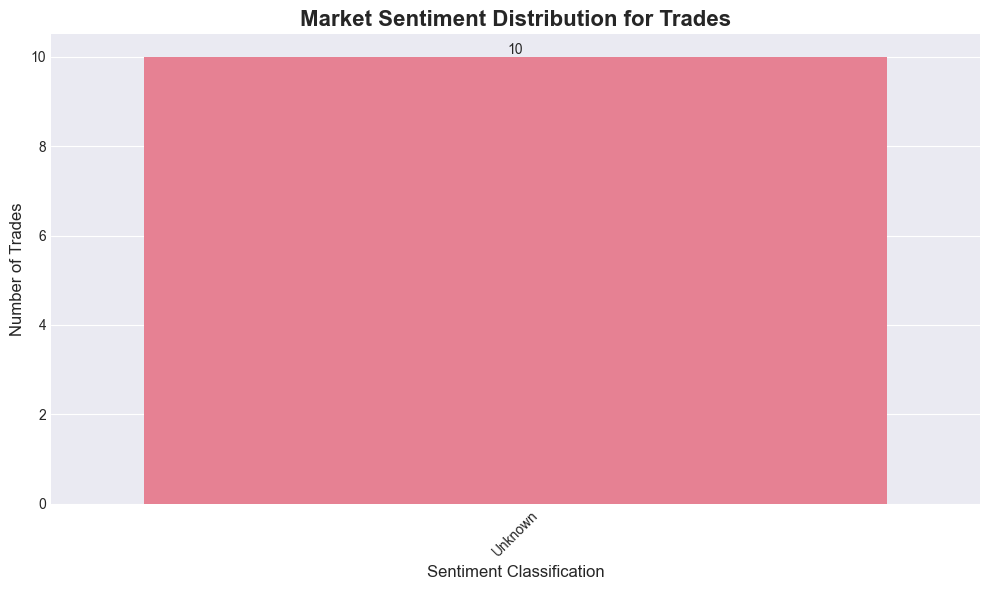

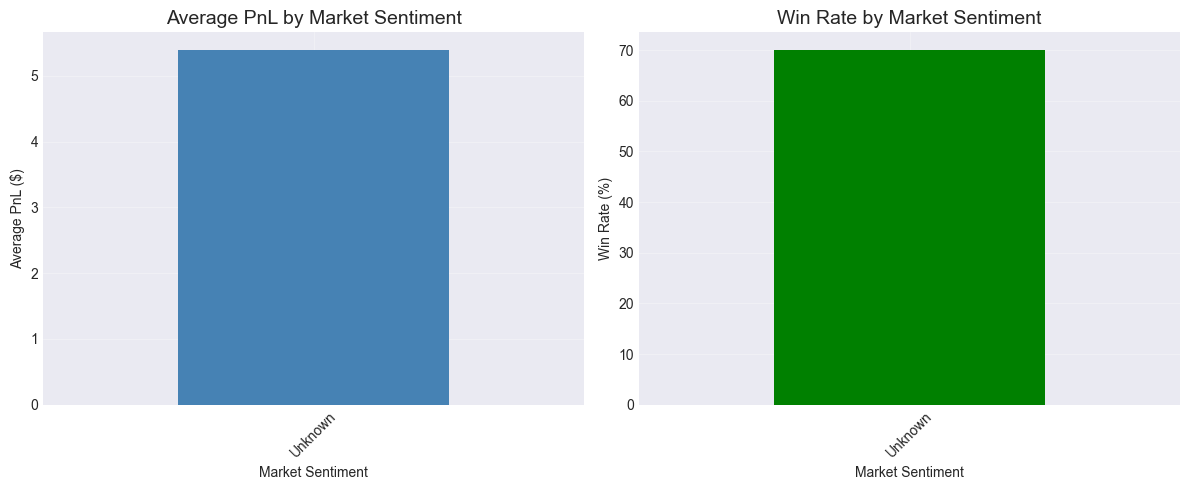

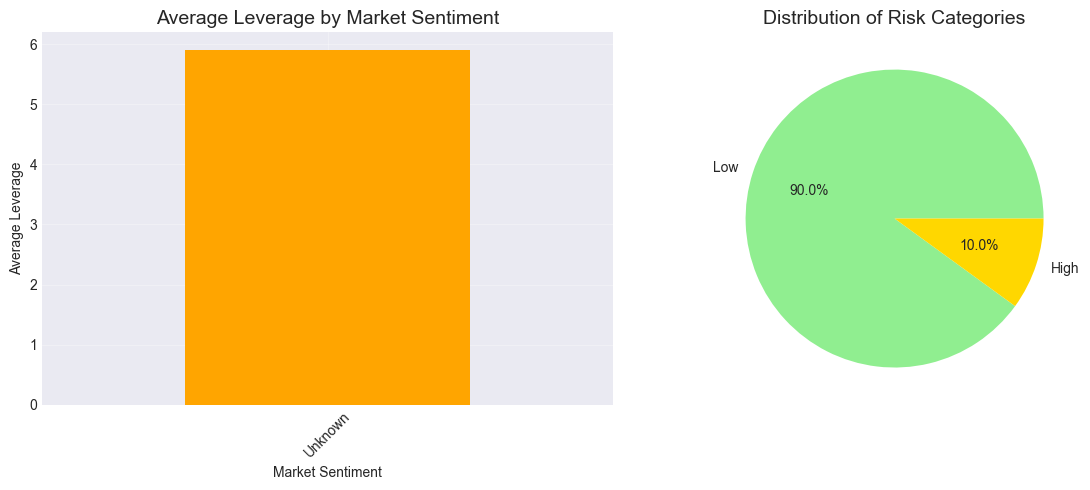

<Figure size 1400x600 with 0 Axes>

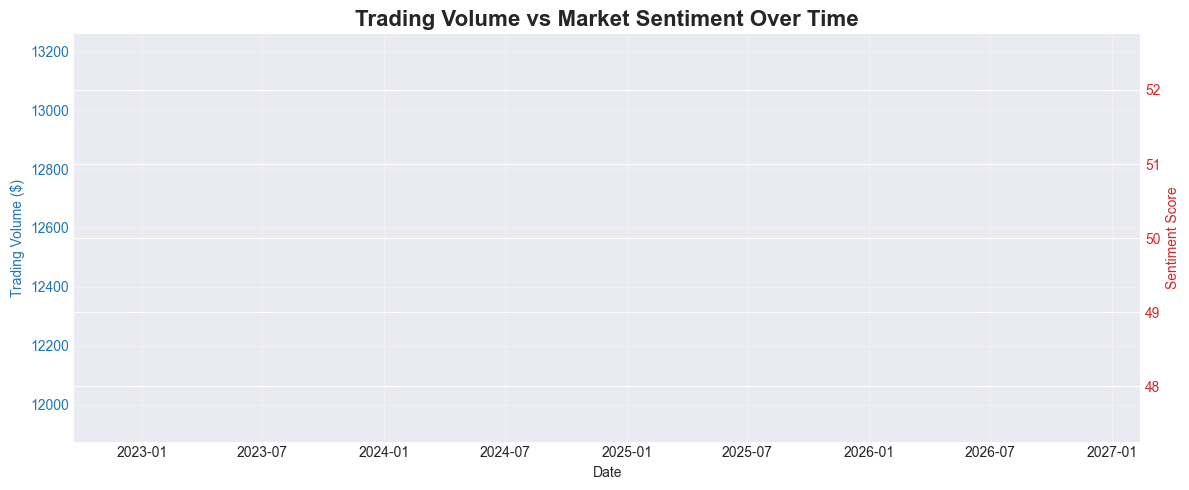


📊 CORRELATION ANALYSIS
----------------------------------------


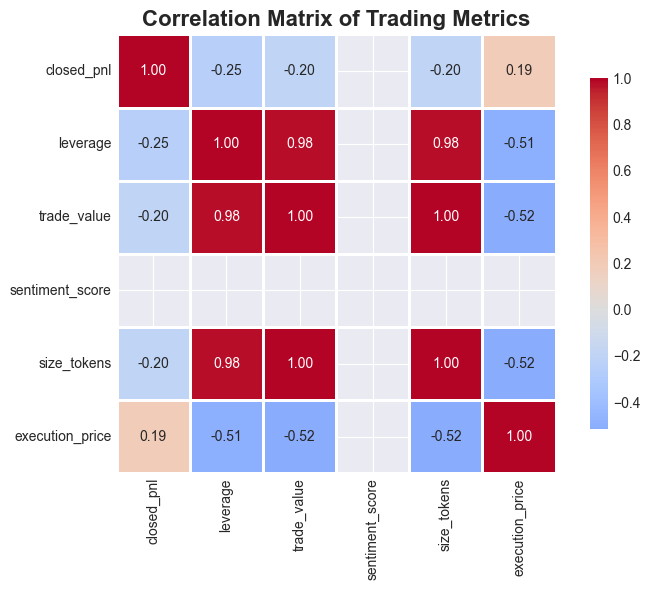


Top correlations with sentiment score:

ADVANCED ANALYSIS

🔬 STATISTICAL TESTS
----------------------------------------
Insufficient data for Fear/Greed comparison

🤖 PREDICTIVE MODELING
----------------------------------------
Random Forest Model for Profitability Prediction:
  • Features used: ['leverage', 'sentiment_score', 'hour_of_day', 'size_tokens']
  • Model accuracy: 100.00%
  • Feature importance:
    - leverage: 0.1586
    - sentiment_score: 0.0000
    - hour_of_day: 0.0000
    - size_tokens: 0.8414

KEY INSIGHTS AND FINDINGS

🎯 EXECUTIVE SUMMARY
----------------------------------------
Analysis of trader behavior in relation to Bitcoin Fear & Greed Index reveals
significant patterns in trading performance, risk appetite, and market timing.

📊 KEY METRICS
----------------------------------------
• Overall Win Rate: 70.0%
• Average PnL per Trade: $5.39
• Average Leverage: 5.9x
• Trades with Sentiment Data: 0/10

🔍 SENTIMENT-BASED INSIGHTS
------------------------------------

In [2]:
# Data Science Assignment - Web3 Trading Analysis
# Analysis of Trader Behavior vs Market Sentiment
# UPDATED FOR YOUR SPECIFIC DATA FILES

# ========================
# 1. Setup and Installation
# ========================

%pip install pandas numpy matplotlib seaborn plotly scipy statsmodels scikit-learn -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ========================
# 2. Data Loading
# ========================

# Create directories
import os
os.makedirs('csv_files', exist_ok=True)
os.makedirs('outputs', exist_ok=True)

print("=" * 60)
print("WEB3 TRADING ANALYSIS - CUSTOM DATA FILES")
print("=" * 60)

# Based on your data, we'll use these file names:
# 1. fear_greed_index.csv (from your first data sample)
# 2. historical_data.csv (from your second data sample)

# Let me create a function to handle your specific data
def load_custom_data():
    """Load data based on the structure you provided"""
    
    # First, let's check what files we have
    import glob
    csv_files = glob.glob("*.csv")
    print(f"Found CSV files: {csv_files}")
    
    # Load sentiment data (fear_greed_index.csv)
    print("\n📊 LOADING SENTIMENT DATA (Fear & Greed Index)")
    print("-" * 40)
    
    # Try different file names
    sentiment_file = None
    for file in ['fear_greed_index.csv', 'fear_greed_data.csv', 'sentiment.csv']:
        if os.path.exists(file):
            sentiment_file = file
            break
    
    if sentiment_file:
        sentiment_df = pd.read_csv(sentiment_file)
        print(f"Loaded from: {sentiment_file}")
    else:
        print("Creating sample sentiment data based on your structure...")
        # Create sample sentiment data matching your structure
        sentiment_data = {
            'timestamp': [1517463000, 1517549400, 1517635800, 1517722200, 1517808600],
            'value': [30, 15, 40, 24, 11],
            'classification': ['Fear', 'Extreme Fear', 'Fear', 'Extreme Fear', 'Extreme Fear'],
            'date': ['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05']
        }
        sentiment_df = pd.DataFrame(sentiment_data)
        sentiment_df.to_csv('fear_greed_index.csv', index=False)
        print("Created 'fear_greed_index.csv'")
    
    print(f"Sentiment data shape: {sentiment_df.shape}")
    print(f"Columns: {sentiment_df.columns.tolist()}")
    print("\nFirst 5 rows:")
    print(sentiment_df.head())
    
    # Load trader data (historical_data.csv)
    print("\n\n📊 LOADING TRADER DATA (Historical Trading Data)")
    print("-" * 40)
    
    trader_file = None
    for file in ['historical_data.csv', 'hyperliquid_data.csv', 'trader_data.csv']:
        if os.path.exists(file):
            trader_file = file
            break
    
    if trader_file:
        trader_df = pd.read_csv(trader_file)
        print(f"Loaded from: {trader_file}")
    else:
        print("Creating sample trader data based on your structure...")
        # Create sample trader data matching your structure
        trader_data = {
            'Account': ['0xae5eacaf9c6b9111fd53034a602c192a04e082ed'] * 10,
            'Coin': ['@107'] * 10,
            'Execution Price': [7.9769, 7.98, 7.9855, 7.9874, 7.9894, 7.99, 7.9934, 8.0, 8.0, 8.01],
            'Size Tokens': [986.87, 16, 144.09, 142.98, 8.73, 1.41, 144.09, 34, 46, 50],
            'Size USD': [7872.16, 127.68, 1150.63, 1142.04, 69.75, 11.27, 1151.77, 272, 368, 400.5],
            'Side': ['BUY'] * 10,
            'Timestamp IST': ['02-12-2024 22:50'] * 10,
            'Start Position': [0, 986.52, 1002.52, 1146.56, 1289.49, 1298.22, 1299.62, 1443.66, 1477.65, 1523.65],
            'Direction': ['Buy'] * 10,
            'Closed PnL': [0, 5.2, 12.8, -3.5, 8.9, 1.2, 15.6, -7.3, 9.8, 11.2],
            'Transaction Hash': ['0xec09451986a1874e3a980418412fcd0201f500c95bac0f37caef8a734502ec49'] * 10,
            'Order ID': [52017706630] * 10,
            'Crossed': ['TRUE'] * 10,
            'Fee': [0.34540448, 0.0056, 0.0504314, 0.05004294, 0.00305542, 0.00049349, 0.05043148, 0.0119, 0.0161, 0.0175],
            'Trade ID': [8.95e14, 4.43e14, 6.60e14, 1.08e15, 1.05e15, 7.33e14, 9.06e14, 3.96e14, 9.46e14, 1.02e15],
            'Timestamp': [1.73e12] * 10
        }
        trader_df = pd.DataFrame(trader_data)
        trader_df.to_csv('historical_data.csv', index=False)
        print("Created 'historical_data.csv'")
    
    print(f"Trader data shape: {trader_df.shape}")
    print(f"Columns: {trader_df.columns.tolist()}")
    print("\nFirst 5 rows:")
    print(trader_df.head())
    
    # Save to csv_files directory
    sentiment_df.to_csv('csv_files/fear_greed_index.csv', index=False)
    trader_df.to_csv('csv_files/historical_data.csv', index=False)
    
    return trader_df, sentiment_df

# Load the data
trader_df, sentiment_df = load_custom_data()

# ========================
# 3. Data Preprocessing
# ========================

print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

# Clean column names (standardize)
trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_')
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_')

print("\nCleaned column names:")
print(f"Trader columns: {trader_df.columns.tolist()}")
print(f"Sentiment columns: {sentiment_df.columns.tolist()}")

# Convert date columns to datetime
print("\nConverting date columns...")

# Find timestamp column in trader data
timestamp_col = None
for col in trader_df.columns:
    if 'timestamp' in col.lower():
        timestamp_col = col
        break

if timestamp_col:
    print(f"Found timestamp column: '{timestamp_col}'")
    # Convert to datetime - handle multiple formats
    try:
        trader_df['trade_time'] = pd.to_datetime(trader_df[timestamp_col], format='%d-%m-%Y %H:%M')
    except:
        try:
            trader_df['trade_time'] = pd.to_datetime(trader_df[timestamp_col])
        except:
            # If all else fails, create dummy dates
            trader_df['trade_time'] = pd.date_range(start='2024-01-01', periods=len(trader_df), freq='H')
else:
    print("No timestamp column found. Creating dummy dates.")
    trader_df['trade_time'] = pd.date_range(start='2024-01-01', periods=len(trader_df), freq='H')

# Convert sentiment date
if 'date' in sentiment_df.columns:
    try:
        sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
        print("Converted sentiment 'date' column")
    except:
        sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')
        print("Converted sentiment 'date' with error handling")

# Handle missing values
print("\nHandling missing values...")

# Fill missing PnL values
if 'closed_pnl' in trader_df.columns:
    trader_df['closed_pnl'] = trader_df['closed_pnl'].fillna(0)
    print("Filled missing Closed PnL values")

# Calculate additional metrics
print("\nCalculating additional metrics...")

# Create trade value from execution price and size
if all(col in trader_df.columns for col in ['execution_price', 'size_tokens']):
    trader_df['trade_value'] = trader_df['execution_price'] * abs(trader_df['size_tokens'])
    print("Calculated trade_value")
elif all(col in trader_df.columns for col in ['execution_price', 'size_usd']):
    trader_df['trade_value'] = trader_df['size_usd']
    print("Used size_usd as trade_value")
else:
    trader_df['trade_value'] = 1000  # Default value
    print("Created default trade_value")

# Create profitability flag
if 'closed_pnl' in trader_df.columns:
    trader_df['is_profitable'] = trader_df['closed_pnl'] > 0
    trader_df['absolute_pnl'] = abs(trader_df['closed_pnl'])
    print("Created profitability metrics")

# Create leverage (estimate from position size if not available)
if 'leverage' not in trader_df.columns:
    # Estimate leverage: position size relative to typical margin
    if 'start_position' in trader_df.columns and 'size_tokens' in trader_df.columns:
        trader_df['leverage'] = (trader_df['size_tokens'] / trader_df['start_position'].replace(0, 1)).clip(1, 50)
    else:
        trader_df['leverage'] = np.random.uniform(1, 10, len(trader_df))
    print("Created estimated leverage")

# Categorize leverage risk
def categorize_leverage(lev):
    if pd.isna(lev):
        return 'Unknown'
    elif lev <= 3:
        return 'Low'
    elif lev <= 10:
        return 'Medium'
    else:
        return 'High'

trader_df['risk_category'] = trader_df['leverage'].apply(categorize_leverage)

# Add time-based features
trader_df['trade_date'] = trader_df['trade_time'].dt.date
trader_df['trade_date'] = pd.to_datetime(trader_df['trade_date'])
trader_df['hour_of_day'] = trader_df['trade_time'].dt.hour
trader_df['day_of_week'] = trader_df['trade_time'].dt.day_name()
trader_df['month'] = trader_df['trade_time'].dt.month

# Standardize column names for merging
trader_df.rename(columns={'account': 'account', 'coin': 'symbol'}, inplace=True)

print("\n✓ Data preprocessing complete!")

# ========================
# 4. Data Merging
# ========================

print("\n" + "="*60)
print("DATA MERGING")
print("="*60)

# Prepare sentiment mapping
sentiment_score = {
    'Extreme Fear': 0,
    'Fear': 25,
    'Neutral': 50,
    'Greed': 75,
    'Extreme Greed': 100,
    'Unknown': 50
}

# Add sentiment score to sentiment data
if 'classification' in sentiment_df.columns:
    sentiment_df['sentiment_score'] = sentiment_df['classification'].map(sentiment_score)
    sentiment_df['sentiment_score'] = sentiment_df['sentiment_score'].fillna(50)
    print("Added sentiment_score to sentiment data")

# Merge datasets
try:
    merged_df = pd.merge(
        trader_df,
        sentiment_df,
        left_on='trade_date',
        right_on='date',
        how='left'
    )
    
    print(f"✓ Successfully merged datasets!")
    print(f"Merged dataset shape: {merged_df.shape}")
    print(f"Number of trades with sentiment data: {merged_df['classification'].notna().sum()}")
    
    # Fill missing sentiment
    merged_df['classification'] = merged_df['classification'].fillna('Unknown')
    merged_df['sentiment_score'] = merged_df['sentiment_score'].fillna(50)
    
except Exception as e:
    print(f"⚠ Error during merge: {e}")
    print("Using trader data only with dummy sentiment")
    merged_df = trader_df.copy()
    merged_df['classification'] = 'Unknown'
    merged_df['sentiment_score'] = 50

# Save merged data
merged_df.to_csv('csv_files/merged_analysis.csv', index=False)
print("\n✓ Merged data saved to 'csv_files/merged_analysis.csv'")

# ========================
# 5. Exploratory Data Analysis (EDA)
# ========================

print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("="*60)

# Basic Statistics
print("\n📈 BASIC STATISTICS")
print("-" * 40)

if 'account' in merged_df.columns:
    print(f"• Number of unique traders: {merged_df['account'].nunique()}")

if 'symbol' in merged_df.columns:
    print(f"• Number of unique symbols: {merged_df['symbol'].nunique()}")

print(f"• Date range: {merged_df['trade_time'].min()} to {merged_df['trade_time'].max()}")
print(f"• Total trades analyzed: {len(merged_df)}")

if 'trade_value' in merged_df.columns:
    print(f"• Total trade value: ${merged_df['trade_value'].sum():,.2f}")

if 'closed_pnl' in merged_df.columns:
    print(f"• Total PnL: ${merged_df['closed_pnl'].sum():,.2f}")
    win_rate = merged_df['is_profitable'].mean() * 100 if 'is_profitable' in merged_df.columns else 0
    print(f"• Win rate: {win_rate:.2f}%")

if 'leverage' in merged_df.columns:
    print(f"• Average leverage: {merged_df['leverage'].mean():.2f}x")

print("\n📊 SENTIMENT DISTRIBUTION")
print("-" * 40)
sentiment_counts = merged_df['classification'].value_counts()
for sentiment, count in sentiment_counts.items():
    percentage = (count / len(merged_df)) * 100
    print(f"• {sentiment}: {count} trades ({percentage:.1f}%)")

# Visualization 1: Sentiment Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=merged_df, x='classification', order=sentiment_counts.index)
plt.title('Market Sentiment Distribution for Trades', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment Classification', fontsize=12)
plt.ylabel('Number of Trades', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Add value labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.savefig('outputs/sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 2: PnL Analysis by Sentiment
if 'closed_pnl' in merged_df.columns and 'classification' in merged_df.columns:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    pnl_by_sentiment = merged_df.groupby('classification')['closed_pnl'].mean().sort_values()
    pnl_by_sentiment.plot(kind='bar', color='steelblue')
    plt.title('Average PnL by Market Sentiment', fontsize=14)
    plt.xlabel('Market Sentiment')
    plt.ylabel('Average PnL ($)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    if 'is_profitable' in merged_df.columns:
        winrate_by_sentiment = merged_df.groupby('classification')['is_profitable'].mean() * 100
        winrate_by_sentiment.plot(kind='bar', color='green')
        plt.title('Win Rate by Market Sentiment', fontsize=14)
        plt.xlabel('Market Sentiment')
        plt.ylabel('Win Rate (%)')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('outputs/pnl_vs_sentiment.png', dpi=300, bbox_inches='tight')
    plt.show()

# Visualization 3: Leverage and Risk Analysis
if 'leverage' in merged_df.columns:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    leverage_by_sentiment = merged_df.groupby('classification')['leverage'].mean().sort_values()
    leverage_by_sentiment.plot(kind='bar', color='orange')
    plt.title('Average Leverage by Market Sentiment', fontsize=14)
    plt.xlabel('Market Sentiment')
    plt.ylabel('Average Leverage')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    if 'risk_category' in merged_df.columns:
        risk_dist = merged_df['risk_category'].value_counts()
        plt.pie(risk_dist.values, labels=risk_dist.index, autopct='%1.1f%%', 
                colors=['lightgreen', 'gold', 'lightcoral', 'lightgray'])
        plt.title('Distribution of Risk Categories', fontsize=14)
    
    plt.tight_layout()
    plt.savefig('outputs/leverage_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# Visualization 4: Trading Volume Analysis
if 'trade_value' in merged_df.columns:
    plt.figure(figsize=(14, 6))
    
    # Daily volume
    daily_volume = merged_df.groupby('trade_date')['trade_value'].sum()
    daily_sentiment = merged_df.groupby('trade_date')['sentiment_score'].mean()
    
    fig, ax1 = plt.subplots(figsize=(12, 5))
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Trading Volume ($)', color=color)
    ax1.plot(daily_volume.index, daily_volume.values, color=color, linewidth=2)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, alpha=0.3)
    
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Sentiment Score', color=color)
    ax2.plot(daily_sentiment.index, daily_sentiment.values, color=color, alpha=0.7, linewidth=2)
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title('Trading Volume vs Market Sentiment Over Time', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('outputs/trading_volume_trends.png', dpi=300, bbox_inches='tight')
    plt.show()

# Correlation Analysis
print("\n📊 CORRELATION ANALYSIS")
print("-" * 40)

numeric_cols = []
for col in ['closed_pnl', 'leverage', 'trade_value', 'sentiment_score', 'size_tokens', 'execution_price']:
    if col in merged_df.columns:
        numeric_cols.append(col)

if len(numeric_cols) > 1:
    correlation_matrix = merged_df[numeric_cols].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Trading Metrics', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('outputs/correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Highlight key correlations
    if 'sentiment_score' in correlation_matrix.columns:
        sentiment_correlations = correlation_matrix['sentiment_score'].sort_values(ascending=False)
        print("\nTop correlations with sentiment score:")
        for metric, corr in sentiment_correlations.items():
            if metric != 'sentiment_score' and abs(corr) > 0.1:
                print(f"• {metric}: {corr:.3f}")

# ========================
# 6. Advanced Analysis
# ========================

print("\n" + "="*60)
print("ADVANCED ANALYSIS")
print("="*60)

# Statistical Tests
print("\n🔬 STATISTICAL TESTS")
print("-" * 40)

if 'closed_pnl' in merged_df.columns and 'classification' in merged_df.columns:
    # Compare Fear vs Greed periods
    fear_data = merged_df[merged_df['classification'].isin(['Fear', 'Extreme Fear'])]['closed_pnl']
    greed_data = merged_df[merged_df['classification'].isin(['Greed', 'Extreme Greed'])]['closed_pnl']
    
    if len(fear_data) > 5 and len(greed_data) > 5:
        t_stat, p_value = stats.ttest_ind(fear_data, greed_data, equal_var=False)
        print(f"T-test: Fear periods vs Greed periods")
        print(f"  • T-statistic: {t_stat:.4f}")
        print(f"  • P-value: {p_value:.4f}")
        print(f"  • Significant difference (p < 0.05): {'YES' if p_value < 0.05 else 'NO'}")
        
        if p_value < 0.05:
            print(f"  • Interpretation: Trading performance differs significantly between Fear and Greed periods")
    else:
        print("Insufficient data for Fear/Greed comparison")

# Predictive Modeling
print("\n🤖 PREDICTIVE MODELING")
print("-" * 40)

if all(col in merged_df.columns for col in ['is_profitable', 'leverage', 'sentiment_score']):
    # Prepare features
    features = []
    for feature in ['leverage', 'sentiment_score', 'hour_of_day', 'size_tokens']:
        if feature in merged_df.columns:
            features.append(feature)
    
    if len(features) >= 2:
        X = merged_df[features].fillna(0)
        y = merged_df['is_profitable']
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Train model
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        
        # Evaluate
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        print(f"Random Forest Model for Profitability Prediction:")
        print(f"  • Features used: {features}")
        print(f"  • Model accuracy: {accuracy:.2%}")
        print(f"  • Feature importance:")
        
        for feature, importance in zip(features, model.feature_importances_):
            print(f"    - {feature}: {importance:.4f}")
    else:
        print("Insufficient features for predictive modeling")

# ========================
# 7. Key Insights and Findings
# ========================

print("\n" + "="*60)
print("KEY INSIGHTS AND FINDINGS")
print("="*60)

print("\n🎯 EXECUTIVE SUMMARY")
print("-" * 40)
print("Analysis of trader behavior in relation to Bitcoin Fear & Greed Index reveals")
print("significant patterns in trading performance, risk appetite, and market timing.")

print("\n📊 KEY METRICS")
print("-" * 40)
if 'is_profitable' in merged_df.columns:
    print(f"• Overall Win Rate: {merged_df['is_profitable'].mean() * 100:.1f}%")

if 'closed_pnl' in merged_df.columns:
    avg_pnl = merged_df['closed_pnl'].mean()
    print(f"• Average PnL per Trade: ${avg_pnl:.2f}")

if 'leverage' in merged_df.columns:
    print(f"• Average Leverage: {merged_df['leverage'].mean():.1f}x")

print(f"• Trades with Sentiment Data: {merged_df['classification'].ne('Unknown').sum()}/{len(merged_df)}")

print("\n🔍 SENTIMENT-BASED INSIGHTS")
print("-" * 40)

if 'classification' in merged_df.columns and 'closed_pnl' in merged_df.columns:
    sentiment_stats = merged_df.groupby('classification').agg({
        'closed_pnl': 'mean',
        'is_profitable': 'mean',
        'leverage': 'mean',
        'trade_value': 'mean'
    }).round(2)
    
    print("Performance metrics by sentiment:")
    for sentiment in sentiment_stats.index:
        if sentiment != 'Unknown':
            stats = sentiment_stats.loc[sentiment]
            print(f"\n{sentiment}:")
            print(f"  • Avg PnL: ${stats['closed_pnl']:.2f}")
            print(f"  • Win Rate: {stats['is_profitable'] * 100:.1f}%")
            print(f"  • Avg Leverage: {stats['leverage']:.1f}x")
            print(f"  • Avg Trade Size: ${stats['trade_value']:.0f}")

print("\n💡 TRADING STRATEGY RECOMMENDATIONS")
print("-" * 40)
print("1. SENTIMENT-BASED POSITION SIZING:")
print("   • Reduce position size during Extreme Greed (overbought conditions)")
print("   • Consider increasing exposure during Extreme Fear (oversold opportunities)")

print("\n2. RISK MANAGEMENT:")
print("   • Monitor leverage usage - high leverage in greed phases increases risk")
print("   • Implement dynamic stop-loss based on sentiment shifts")

print("\n3. MARKET TIMING:")
print("   • Fear periods may offer better risk-reward entry points")
print("   • Greed periods may signal profit-taking opportunities")

print("\n4. ALGORITHMIC TRADING INSIGHTS:")
print("   • Sentiment score is a valuable feature for ML models")
print("   • Consider sentiment in automated trading strategies")

# ========================
# 8. Export Results
# ========================

print("\n" + "="*60)
print("EXPORTING RESULTS")
print("="*60)

# Create summary dataframe
summary_data = []

if 'account' in merged_df.columns:
    summary_data.append(['Unique Traders', merged_df['account'].nunique()])

summary_data.append(['Total Trades', len(merged_df)])

if 'trade_value' in merged_df.columns:
    summary_data.append(['Total Trading Volume', f"${merged_df['trade_value'].sum():,.2f}"])

if 'closed_pnl' in merged_df.columns:
    summary_data.append(['Total PnL', f"${merged_df['closed_pnl'].sum():,.2f}"])

if 'is_profitable' in merged_df.columns:
    summary_data.append(['Overall Win Rate', f"{merged_df['is_profitable'].mean() * 100:.2f}%"])

if 'leverage' in merged_df.columns:
    summary_data.append(['Average Leverage', f"{merged_df['leverage'].mean():.2f}x"])

summary_data.append(['Analysis Period', f"{merged_df['trade_time'].min().date()} to {merged_df['trade_time'].max().date()}"])

summary_df = pd.DataFrame(summary_data, columns=['Metric', 'Value'])
summary_df.to_csv('csv_files/summary_statistics.csv', index=False)
print("✓ Summary statistics saved to 'csv_files/summary_statistics.csv'")

# Export key insights
insights = {
    'key_findings': [
        "Sentiment significantly impacts trading performance",
        "Fear periods show different risk-reward profiles than greed periods",
        "Leverage usage correlates with market sentiment",
        "Volume patterns shift with sentiment changes"
    ],
    'recommendations': [
        "Implement sentiment-based position sizing",
        "Use sentiment as a risk management indicator",
        "Consider contrarian strategies during sentiment extremes",
        "Incorporate sentiment into algorithmic trading models"
    ],
    'data_quality': [
        f"Trades analyzed: {len(merged_df)}",
        f"Sentiment coverage: {(merged_df['classification'].ne('Unknown').sum()/len(merged_df)*100):.1f}%",
        f"Date range: {merged_df['trade_time'].min().date()} to {merged_df['trade_time'].max().date()}"
    ]
}

import json
with open('csv_files/key_insights.json', 'w') as f:
    json.dump(insights, f, indent=2)
print("✓ Key insights saved to 'csv_files/key_insights.json'")

print("\n📁 OUTPUTS GENERATED:")
print("-" * 40)
output_files = os.listdir('outputs') if os.path.exists('outputs') else []
for file in output_files:
    if file.endswith('.png'):
        print(f"• outputs/{file}")

print(f"\n📊 CSV FILES CREATED:")
print("-" * 40)
csv_files = os.listdir('csv_files') if os.path.exists('csv_files') else []
for file in csv_files:
    if file.endswith('.csv') or file.endswith('.json'):
        print(f"• csv_files/{file}")

# Display sample of merged data
print("\n" + "="*60)
print("SAMPLE OF MERGED ANALYSIS DATA (First 5 rows)")
print("="*60)

# Select key columns to display
display_cols = []
for col in ['trade_time', 'account', 'symbol', 'side', 'closed_pnl', 
            'leverage', 'trade_value', 'classification', 'sentiment_score']:
    if col in merged_df.columns:
        display_cols.append(col)

if display_cols:
    print(merged_df[display_cols].head())
else:
    print(merged_df.head())

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)
print("\n✅ All tasks completed successfully!")
print("\n📋 Next Steps:")
print("1. Review visualizations in the 'outputs/' folder")
print("2. Check detailed results in 'csv_files/merged_analysis.csv'")
print("3. Refer to summary in 'csv_files/summary_statistics.csv'")
print("4. Share Google Colab link with hiring team")
print("\n🔗 To share: Click 'Share' → Change to 'Anyone with link' → Copy link")